# From the Tile to ROC space

In [1]:
%matplotlib tk

import matplotlib.pyplot as plt
from matplotlib.backend_bases import MouseButton
from matplotlib.widgets import Slider

from sorbetto.parameterization import ParameterizationDefault
from sorbetto.tile import Tile
from sorbetto.ranking import RankingScore
from sorbetto.annotation import AnnotationText

In [2]:
# Create an empty tile with common score annotations
parameterization = ParameterizationDefault()
tile = Tile(parameterization=parameterization)

accuracy_score = RankingScore.getAccuracy()
accuracy_point_annotation = AnnotationText(location=accuracy_score, color="C0")
tile.appendAnnotation(accuracy_point_annotation)

F1_score = RankingScore.getF(1.0)
F1_point_annotation = AnnotationText(location=F1_score, color="C0")
tile.appendAnnotation(F1_point_annotation)

precision_score = RankingScore.getPrecision()
precision_point_annotation = AnnotationText(location=precision_score, color="C0")
tile.appendAnnotation(precision_point_annotation)

recall_score = RankingScore.getRecall()
recall_point_annotation = AnnotationText(location=recall_score, color="C0")
tile.appendAnnotation(recall_point_annotation)

NPV_score = RankingScore.getNegativePredictiveValue()
NPV_point_annotation = AnnotationText(location=NPV_score, color="C0")
tile.appendAnnotation(NPV_point_annotation)

TNR_score = RankingScore.getTrueNegativeRate()
TNR_point_annotation = AnnotationText(location=TNR_score, color="C0")
tile.appendAnnotation(TNR_point_annotation)

dummy_annotation = AnnotationText(location=accuracy_score, label="", color="C1")

In [3]:
# Draw colorbar only once
draw_cbar = True


# Draw a Tile and a ROC space
def draw_score(fig, axes, prior, coords):
    global draw_cbar
    score = parameterization.getCanonicalRankingScore(*coords)
    score_annotation = AnnotationText(score, label="", color="C1")

    tile.popAnnotation()
    tile.appendAnnotation(score_annotation)

    tile_ax, roc_ax = axes
    tile.draw(fig, tile_ax)
    score.drawInROC(fig, roc_ax, prior, show_colorbar=draw_cbar)

    draw_cbar = False

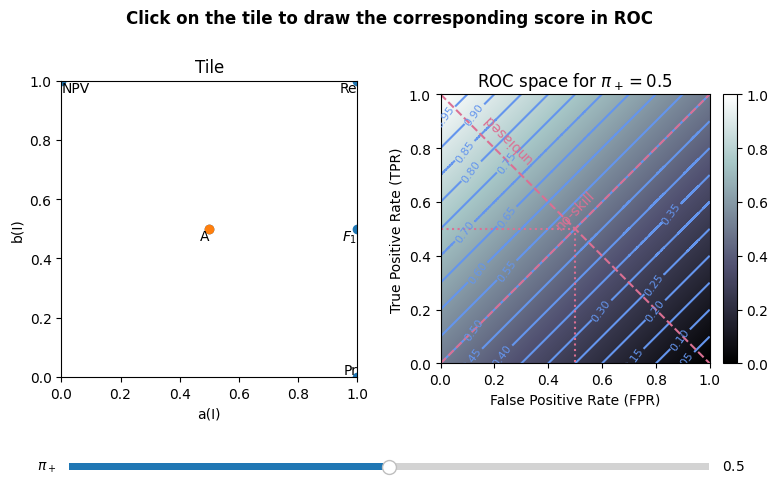

In [4]:
# Set default values
prior = 0.5
coords = (0.5, 0.5)

# Create the initial figure
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
draw_score(fig, axes, prior, coords)
fig.suptitle(
    "Click on the tile to draw the corresponding score in ROC", fontweight="bold"
)
fig.tight_layout(pad=1.5)
axslide = fig.add_axes([0.1, 0.05, 0.8, 0.03])
slider = Slider(ax=axslide, label=r"$\pi_+$", valmin=0, valmax=1, valinit=prior)
fig.subplots_adjust(bottom=0.2)


# Update when clicking the Tile
def update_click(event):
    if event.inaxes != axes[0]:
        return
    elif event.button is MouseButton.LEFT:
        coords = event.xdata, event.ydata

        print(fig.get_axes())
        for ax in axes:
            ax.clear()
        draw_score(fig, axes, prior, coords)
        plt.show()


# Update when moving the prior slider
def update_slider(val):
    global prior
    prior = val

    for ax in axes:
        ax.clear()
    draw_score(fig, axes, prior, coords)
    plt.show()


plt.connect("button_press_event", update_click)
slider.on_changed(update_slider)
plt.show()
fig